In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the Dataset
dataset = pd.read_csv('all_data.csv')
#dataset
dataset.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
x = []
for i in range(150):
    x.append(i)
temp_y = dataset.iloc[4150:4300,2]

In [4]:
# Feature Scaling
month = np.reshape(x, (-1, 1))
temps = np.reshape(temp_y,(-1, 1))

/srv/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [5]:
#Handling Missing Data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(temps)
temp = imputer.transform(temps)
#print(temp)

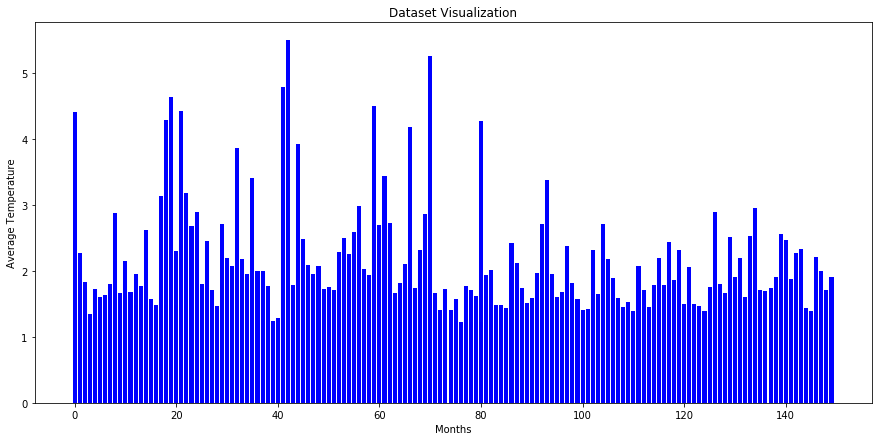

In [6]:
#Dataset Visualization
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure
plt.figure(figsize=(15,7))
plt.bar(x, temp_y,color ='blue')
plt.title('Dataset Visualization')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.savefig('Dataset Visualization')
plt.show()

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
month_train, month_test, temp_train, temp_test = train_test_split(month, temp, test_size = 1/3, random_state = 0)

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear Regression

In [8]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(month_train, temp_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Predicting the Test set results
lin_temp_pred = linear_regressor.predict(month_test)

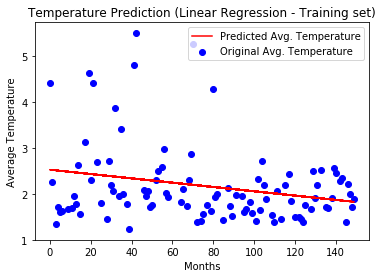

In [10]:
# Visualising the Training set results
plt.scatter(month_train, temp_train, color = 'blue', label='Original Avg. Temperature')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Avg. Temperature')
plt.title('Temperature Prediction (Linear Regression - Training set)')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper right')
plt.savefig('Linear Regression - Training set')
plt.show()

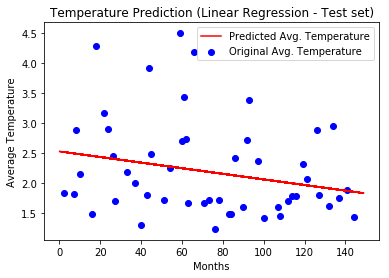

In [11]:
# Visualising the Test set results
plt.scatter(month_test, temp_test, color = 'blue', label='Original Avg. Temperature')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Avg. Temperature')
plt.title('Temperature Prediction (Linear Regression - Test set)')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper right')
plt.savefig('Linear Regression - Test set')
plt.show()

In [12]:
# The coefficient of determination R^2 of the prediction.
linear_accuracy = linear_regressor.score(month, temp, sample_weight=None)
print("Linear Regression Accuracy: %.3f%%" % (linear_accuracy*100.0))

Linear Regression Accuracy: 5.905%


# Polynomial Regression

Best degree 5 with RMSE 0.775004915529759


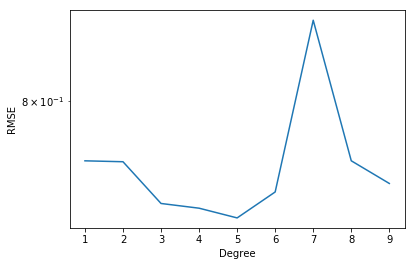

In [13]:
# Importing the libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

rmses = []
#Taking the range of degrees
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    month_poly_train = poly_features.fit_transform(month_train)

    poly_reg = LinearRegression()
    poly_reg.fit(month_poly_train, temp_train)

    month_poly_test = poly_features.fit_transform(month_test)
    poly_predict = poly_reg.predict(month_poly_test)
    poly_mse = mean_squared_error(temp_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

In [14]:
# Fitting Polynomial Regression to the dataset
poly_regressor = PolynomialFeatures(degree = 5)
month_poly = poly_regressor.fit_transform(month)
poly_regressor.fit(month_poly, temp)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(month_poly, temp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

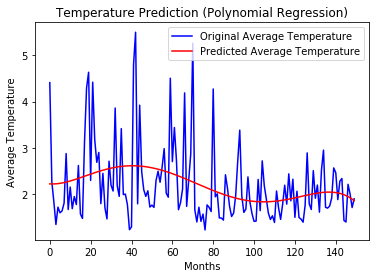

In [15]:
# Visualising the Polynomial Regression results
plt.plot(month, temp, color = 'blue', label='Original Average Temperature')
plt.plot(month, linear_regressor_2.predict(poly_regressor.fit_transform(month)), color = 'red', label='Predicted Average Temperature')
plt.title('Temperature Prediction (Polynomial Regression)')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper right')
plt.savefig('Polynomial Regression')
plt.show()

In [16]:
# The coefficient of determination R^2 of the prediction.
from sklearn.metrics import r2_score
temp_pred_poly = linear_regressor_2.predict(poly_regressor.fit_transform(month))
poly_accuracy = r2_score(temp, temp_pred_poly)
print("Polynomial Regression Accuracy: %.3f%%" % (poly_accuracy*100.0))

Polynomial Regression Accuracy: 10.319%


# Decision tree regression

In [17]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 5, random_state = 1)
dt_regressor.fit(month, temp)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [18]:
# Predicting a new result
dt_temp_pred = dt_regressor.predict(month)

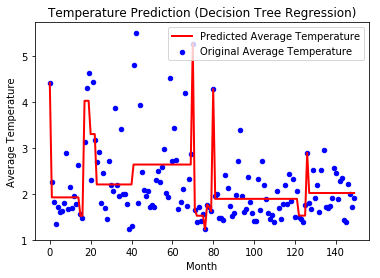

In [19]:
# Visualising the Decision Tree Regression results
plt.scatter(month, temp, s=20, color = 'blue', label='Original Average Temperature')
plt.plot(month, dt_temp_pred, color = 'red', label='Predicted Average Temperature', linewidth=2)
plt.title('Temperature Prediction (Decision Tree Regression)')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.legend(loc='upper right')
plt.savefig('Decision Tree Regression')
plt.show()

In [20]:
# The coefficient of determination R^2 of the prediction.
dt_accuracy = dt_regressor.score(month, temp)
print("Decision Tree Regression Accuracy: %.3f%%" % (dt_accuracy*100.0))

Decision Tree Regression Accuracy: 47.780%


## THE END